# Projet numérique: câble sous-marin 

### Hugo TISSOT - Victor GAUTIER 

## I) Partie théorique 

#### Question 1

On utilise ici la méthode de Monte-Carlo pour estimer L*, la valabilité de cette dernière résulte de la loi forte des grands nombres.

Rappelons cette dernière :

Soit $(X_n)$ une suite de variables aléatoires indépendantes, de même lois, et intégrables
Alors la suite $(M_n)$ définie par

$M_n = \frac{X_1+.......+X_n}{n}$

converge vers $\mathbb{E}(X_n)$ presque sûrement et en moyenne quand n tend vers l'infini.

Dans le cadre de ce projet cette loi s'applique car chaque $l(k)$ pour tout k $\in \{1,...,K\}$ sont indépendantes de par l'indépendance de chaque simulation, suivent la même loi que la variable aléatoire $L|Z(x_{j1})=z(x_{j1}),....,Z(x_{jn}=z(x_{jn})$ et sont intégrables car bornés puisque $L$ est bornée.

Ainsi en supposant $K$ suffisament grand on sait que la moyenne des $l(k)$ sera une bonne estimation de $L*$ 

#### Question 2

On considérera d'une part les profondeurs des points pour lesquels on détient une mesure représentées par la variable aléatoire $Y = (Z(x_{j1}),..,Z(x_{jn}))$ et celles pour lesquels on ne détient aucune mesure, elles sont $N+1-n$ représentées par la variable aléatoire $X = (Z(x_i))$ pour $i \in \{0,...,N\}\setminus\{j_1,...,j_n\}$

L'ensemble des profondeurs des points est donc décrit par la variable aléatoire $Z = (X,Y)$ (Ordre des composantes différent de celui de l'énoncé)

En suivant donc la même méthode que celle présentée dans le paragraphe Vecteur Gaussiens à densité du polycopié IV de probabilité, on considère la matrice de covariance de $Z$ ci dessous :

\begin{pmatrix}
C_X & C_{X,Y} \\
C_{Y,X} & C_Y
\end{pmatrix}

où $C_X$ et $C_Y$ sont les matrices de covariance respectives de $X$ et $Y$ et $C_{X,Y} = Cov(X,Y) C_{Y,X} = Cov(Y,X)$

Ainsi la variable aléatoire $X|(Y=z)$ où $z = (z(x_{j1}),..,z(x_{jn}))$ suit une loi gausienne d'espérance 
$E = \mathbb{E}(X) + C_{X,Y}C_Y^{-1}(z-\mathbb{E}(Y))$ 

et de matrice de covariance $C_{X|Y=z} = C_X - C_{X,Y}C_Y^{-1}C_{Y,X}$




#### Question 3

Soit $A = (A_1,..,A_p)$ vecteur de composante gausienne indépendantes, toutes d'espérance nulle et de variance égale à 1, $R$ une matrice $p\times p$ et $m$ un vecteur de taille $p$

alors $B = m + RA$

est un vecteur aléatoire gaussien comme combinaison linéaire de vecteurs aléatoires gaussiens, d'espérance $m$ (par linéarité de l'espérance) et de matrice de covariance $C=RR^{T}$ 

#### Question 4

On a dans le cas pratique $Y=z$. Donc $Z=(X,z)$ (En s'accordant une liberté sur l'ordre des composantes du vecteur dans un premier temps)

On sait que la variable aléatoire d'intérêt à savoir $X|(Y=z)$ suit une loi gaussienne d'espérance $m$, vecteur de N+1-n composantes toutes égales à $\mu$ et de matrice de covariance $C_{X|(Y=z)}$ définie plus haut. On connait $\mu$ et $C_{X|(Y=z)}$ car on connait $C$ dans le cadre de ce problème.

On va alors réaliser une factorisation de Cholesky pour obtenir $R$ telle que $C_{X|(Y=z)} = RR^{T}$. On s'intéressera alors à la variable aléatoire $B = m + RA$ où $A$ sera une variable aléatoire suivant une loi normale centrée réduite que python peut simuler et on sait que B suit la même loi que $X|(Y=z)$ d'après la question précédente on peut donc dire que $Z=(B,z)$

Enfin on calcule les $l(k)$ pour plusieurs simulations donnant à priori un $B$ différent et donc un $Z$ différent et on moyenne ces longueurs simulées pour déterminer $L*$ (méthode de Monte-Carlo)

## II) Simulation numérique 


In [36]:
#Importation de modules
import numpy as np
import matplotlib.pyplot as plt
import random

In [11]:
#Discrétisation 
A=0 
B=500 
N=101 

#Nombre de points de discrétisation 
Delta = (B-A)/(N-1) 
discretization_indexes = np.arange(N) 
discretization = discretization_indexes*Delta 

#Paramètres du modèle
mu=-5 
a = 50 
sigma2 = 12

#Données
observation_indexes = [0,20,40,60,80,100] 
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées
unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


### 1. La fonction covariance 

In [12]:
# Cette fonction renvoie la matrice de covariance obtenue à partir d'une matrice de points  
def covariance(distance,a=50,sigma2=12):
    Cov=np.zeros(distance.shape)
    for i in range (distance.shape[0]):
        for j in range (distance.shape[1]):
            Cov[i][j]=sigma2*np.exp(-abs(distance[i][j])/a)     
    return Cov 
              

### 2. Calcul de la matrice de distance 

In [13]:
def mat_distance(lis_points1,lis_points2):#On prévoit le fait que la matrice de distance n'est pas nécessairement carrée
    l1=len(lis_points1)
    l2=len(lis_points2)
    Distance=np.zeros((l1,l2))
    for i in range(l1):
        for j in range(l2):
            Distance[i][j]=abs(lis_points1[i]-lis_points2[j])
    return Distance
                               

### 3. Calcul de la matrice de covariance du vecteur Z = ( Z($x_{0}$),...,Z($x_{N}$) )

In [14]:
covariance(mat_distance(discretization,discretization))

array([[1.20000000e+01, 1.08580490e+01, 9.82476904e+00, ...,
        6.65419193e-04, 6.02096185e-04, 5.44799157e-04],
       [1.08580490e+01, 1.20000000e+01, 1.08580490e+01, ...,
        7.35401941e-04, 6.65419193e-04, 6.02096185e-04],
       [9.82476904e+00, 1.08580490e+01, 1.20000000e+01, ...,
        8.12744838e-04, 7.35401941e-04, 6.65419193e-04],
       ...,
       [6.65419193e-04, 7.35401941e-04, 8.12744838e-04, ...,
        1.20000000e+01, 1.08580490e+01, 9.82476904e+00],
       [6.02096185e-04, 6.65419193e-04, 7.35401941e-04, ...,
        1.08580490e+01, 1.20000000e+01, 1.08580490e+01],
       [5.44799157e-04, 6.02096185e-04, 6.65419193e-04, ...,
        9.82476904e+00, 1.08580490e+01, 1.20000000e+01]])

### 4. Extraction des matrices de covariance 

In [15]:
# entre les observations 
observation=np.array(observation_indexes)*Delta 
covariance(mat_distance(observation,observation))

array([[1.20000000e+01, 1.62402340e+00, 2.19787667e-01, 2.97450261e-02,
        4.02555153e-03, 5.44799157e-04],
       [1.62402340e+00, 1.20000000e+01, 1.62402340e+00, 2.19787667e-01,
        2.97450261e-02, 4.02555153e-03],
       [2.19787667e-01, 1.62402340e+00, 1.20000000e+01, 1.62402340e+00,
        2.19787667e-01, 2.97450261e-02],
       [2.97450261e-02, 2.19787667e-01, 1.62402340e+00, 1.20000000e+01,
        1.62402340e+00, 2.19787667e-01],
       [4.02555153e-03, 2.97450261e-02, 2.19787667e-01, 1.62402340e+00,
        1.20000000e+01, 1.62402340e+00],
       [5.44799157e-04, 4.02555153e-03, 2.97450261e-02, 2.19787667e-01,
        1.62402340e+00, 1.20000000e+01]])

In [16]:
# entre les inconnues 
unknown=np.array(unknown_indexes)*Delta 
covariance(mat_distance(unknown,unknown))

array([[1.20000000e+01, 1.08580490e+01, 9.82476904e+00, ...,
        8.12744838e-04, 7.35401941e-04, 6.65419193e-04],
       [1.08580490e+01, 1.20000000e+01, 1.08580490e+01, ...,
        8.98221959e-04, 8.12744838e-04, 7.35401941e-04],
       [9.82476904e+00, 1.08580490e+01, 1.20000000e+01, ...,
        9.92688787e-04, 8.98221959e-04, 8.12744838e-04],
       ...,
       [8.12744838e-04, 8.98221959e-04, 9.92688787e-04, ...,
        1.20000000e+01, 1.08580490e+01, 9.82476904e+00],
       [7.35401941e-04, 8.12744838e-04, 8.98221959e-04, ...,
        1.08580490e+01, 1.20000000e+01, 1.08580490e+01],
       [6.65419193e-04, 7.35401941e-04, 8.12744838e-04, ...,
        9.82476904e+00, 1.08580490e+01, 1.20000000e+01]])

In [17]:
# entre et les observations et les inconnues 
covariance(mat_distance(unknown,observation))

array([[1.08580490e+01, 1.79482343e+00, 2.42902937e-01, 3.28733378e-02,
        4.44892249e-03, 6.02096185e-04],
       [9.82476904e+00, 1.98358666e+00, 2.68449262e-01, 3.63306569e-02,
        4.91681975e-03, 6.65419193e-04],
       [8.88981865e+00, 2.19220229e+00, 2.96682318e-01, 4.01515855e-02,
        5.43392619e-03, 7.35401941e-04],
       [8.04384055e+00, 2.42275822e+00, 3.27884669e-01, 4.43743646e-02,
        6.00541720e-03, 8.12744838e-04],
       [7.27836792e+00, 2.67756192e+00, 3.62368601e-01, 4.90412573e-02,
        6.63701244e-03, 8.98221959e-04],
       [6.58573963e+00, 2.95916357e+00, 4.00479240e-01, 5.41989713e-02,
        7.33503313e-03, 9.92688787e-04],
       [5.95902365e+00, 3.27038152e+00, 4.42598009e-01, 5.98991269e-02,
        8.10646530e-03, 1.09709078e-03],
       [5.39194757e+00, 3.61433054e+00, 4.89146448e-01, 6.61987730e-02,
        8.95902970e-03, 1.21247282e-03],
       [4.87883592e+00, 3.99445300e+00, 5.40590429e-01, 7.31609588e-02,
        9.90125908e-03, 

### 5. Calcul de l’espérance conditionnelle des composantes non observées connaissant les observations 

$\text{On note } Inc \text{ le vecteur aléatoire des inconnues et } Obs \text{ le vecteur aléatoire des observations.}\\
\text{D'après le cours, l'espérance conditionnelle de } Inc \text{ sachant } Obs \text{ est la variable aléatoire: }\\
\mathbb{E}(Inc|Obs)=\mathbb{E}(Inc)+Cov(Inc,Obs)\,Cov(Obs,Obs)^{-1}(Obs-\mathbb{E}(Obs))$

In [18]:
esp_obs=np.array([mu for k in range(depth.shape[0])])
esp_inc=np.array([mu for k in range(len(unknown_indexes))])
cov_inc_obs=covariance(mat_distance(unknown,observation))
cov_obs=covariance(mat_distance(observation,observation))
obs=depth
# On utilise la formule précédente 
esp_inc_sachant_obs=esp_inc+cov_inc_obs.dot(np.linalg.inv(cov_obs)).dot(depth-esp_obs)
print(esp_inc_sachant_obs)

[ -0.46688335  -0.88839774  -1.26876184  -1.61178245  -1.92089264
  -2.19918609  -2.44944805  -2.67418323  -2.87564085  -3.05583718
  -3.21657567  -3.35946505  -3.4859354   -3.59725249  -3.69453041
  -3.77874275  -3.85073233  -3.91121966  -3.96081011  -4.31432093
  -4.62177936  -4.92545243  -5.2283794   -5.53359206  -5.8441451
  -6.16314662  -6.49378931  -6.83938234  -7.20338453  -7.58943893
  -8.00140931  -8.4434188   -8.91989118  -9.43559515  -9.99569205
 -10.60578751 -11.27198758 -12.00095981 -11.91810571 -11.10545015
 -10.35389999  -9.65593346  -9.00456508  -8.39327573  -7.81594742
  -7.26680206  -6.74034362  -6.23130312  -5.73458592  -5.2452207
  -4.75830973  -4.26897984  -3.77233366  -3.26340058  -2.73708703
  -2.18812549  -1.61102176  -1.43702815  -1.83839689  -2.20812324
  -2.54990754  -2.8671705   -3.16308739  -3.44061983  -3.70254547
  -3.95148576  -4.18993216  -4.42027113  -4.64480797  -4.86578994
  -5.08542869  -5.30592243  -5.52947795  -5.75833267  -5.99477703
  -6.2411774

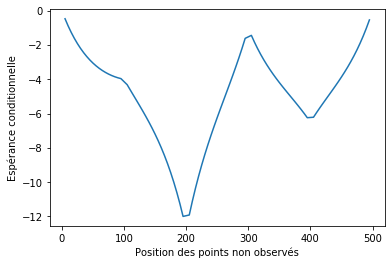

In [19]:
# Représentation graphique 
plt.plot(unknown,esp_inc_sachant_obs)
plt.xlabel('Position des points non observés')
plt.ylabel('Espérance conditionnelle')
plt.show()

### 6. Calcul de la matrice de variance conditionnelle 

$\text{D'après le cours, la matrice de variance conditionnelle de } Inc \text{ sachant } Obs \text { est : }\\
Var\,(Inc|Obs)=Cov(Inc,Inc) - Cov(Inc,Obs)\,Cov(Obs,Obs)^{-1}\,Cov(Obs,Inc)$

In [20]:
cov_obs_inc=covariance(mat_distance(observation,unknown))
cov_inc=covariance(mat_distance(unknown,unknown))
# Avec la formule précédente,on calcule la variance conditionnelle des points inconnus, 
var_inc_sachant_obs=cov_inc-cov_inc_obs.dot(np.linalg.inv(cov_obs)).dot(cov_obs_inc)
print(var_inc_sachant_obs)

[[ 2.16624554e+00  1.95016959e+00  1.75361159e+00 ...  6.50521303e-19
   1.51788304e-18  5.42101086e-19]
 [ 1.95016959e+00  3.91985713e+00  3.52477392e+00 ...  2.16840434e-19
   1.19262239e-18  1.40946282e-18]
 [ 1.75361159e+00  3.52477392e+00  5.33121337e+00 ... -8.67361738e-19
  -1.08420217e-19  2.16840434e-19]
 ...
 [ 1.08420217e-19 -2.16840434e-19 -1.08420217e-18 ...  5.33121337e+00
   3.52477392e+00  1.75361159e+00]
 [ 7.58941521e-19  4.33680869e-19 -4.33680869e-19 ...  3.52477392e+00
   3.91985713e+00  1.95016959e+00]
 [ 0.00000000e+00  9.75781955e-19  1.08420217e-19 ...  1.75361159e+00
   1.95016959e+00  2.16624554e+00]]


In [21]:
# Représentation de la diagonale en fonction de la position 
diagonale=np.array([var_inc_sachant_obs[i][i] for i in range(len(var_inc_sachant_obs))])
plt.plot(discretization, var_tot)
# On rajoute les points observés dont la variance conditionnelle est nulle, 
var_tot=[(0 if i%20 == 0 else diagonale[i - (i//20 + 1)]) for i in range (N)]
plt.xlabel('Position des points')
plt.ylabel('Variance conditionnelle')
plt.show()

NameError: name 'var_tot' is not defined

### 7. Simulation conditionnelle 

In [38]:
# On utilse la méthode de Box-Muller 
def boxMuller():
    Y=np.zeros(len(unknown_indexes))
    U=np.zeros(len(unknown_indexes))
    V=np.zeros(len(unknown_indexes))
    for k in range(len(unknown_indexes)):
        U[k] = (random.random()-random.random()+1)/2 # On veut générer un nombre aléatoire dans ]0,1[ et non [0,1[
        V[k] = (random.random()-random.random()+1)/2 
    Y = np.sqrt(-2*np.log(U))*np.cos(2*np.pi*V)
    R = np.linalg.cholesky(var_inc_sachant_obs)
    Z= (mu + R.dot(Y)).tolist()
    Z_simulation = [0] + Z[0:19] + [-4] + Z[19:38] + [-12.8] + Z[38:57] + [-1] + Z[57:76] + [-6.5] + Z[76:95] + [0]
    return Z_simulation 


In [39]:
# Représentation graphique 
plt.plot(discretization, Z, label="Points simulés")
plt.plot(observation, depth, 'rx', label='Points observés')
plt.plot(unknown,esp_inc_sachant_obs, label='Esperance conditionnelle')
plt.legend()
plt.show()

NameError: name 'Z' is not defined

### 8. Calcul de la longueur du câble 

In [40]:
def long_cable(vect_profondeur, pas) :
    L = 0
    l= vect_profondeur.shape[0]
    
    for i in range(1,l) :
        L += np.sqrt(pas**2 + (vect_profondeur[i] - vect_profondeur[i-1])**2)
    return L

### 9. Calcul longueur de câble pour 100 simulations 

In [41]:
longueurs=[]
for i in range(100):
    l=long_cable(boxMuller(),Delta)
    longueurs.append(l)
print(f"L'espérance conditionnelle (estimée) de la longueur vaut: {sum(longeurs)/100}")


print(f"La longueur de l'espérance conditionnelle vaut:{long_cable(esp_inc_sachant_obs,Delta)}")


AttributeError: 'list' object has no attribute 'shape'

On remarque que le longueur de l'espérance conditionnelle est plus petite que l'espérance conditionnelle de la longueur. 

### 10. Représentation de la suite $M_{n}$ des moyennes des longueurs de câble 

In [ ]:
les_moy=[]
les_simul=np.arange(1,201) #doute sur l'arange 
for n in range(1,201):
    longueurs=[]
    for i in range(n):
        l=long_cable(boxMuller(),Delta)
        longueurs.append(l)
    les_moy.append(sum(longueurs)/n)

plt.plot(les_simul,les_moy)
plt.xlabel("Nombre de simulations")
plt.ylabel("Moyennes des longueurs de cable")
plt.show()

    

Commentaire?